In [1]:
#@title
import numpy as np
import cv2
import scipy.io
import os
from numpy.linalg import norm
from matplotlib import pyplot as plt
from numpy.linalg import det
from numpy.linalg import inv
from scipy.linalg import rq
from numpy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import sys
from scipy import ndimage, spatial

In [6]:
###############################################EXTRA CREDIT PART##############################################

def harriscornerdetector(Image):
    '''
    Extra Credit Part
    Goal:Compute Harris Features
    Steps Followed
    1.Apply two filters on the entire image to get the derivative image of x axis and y axis
    2.Computed the harris matrix of each pixel in its neighborhood using a gaussian mask and the derivative images.
    Sum over a 5X5 window. Apply 5X5 Guassian mask with .5 standard deviation 
    3.Then compute the harris score using the matrix
    The response is given by the formula 
    R_score=det(M)-alpha*trace(M)^2 for each pixel window
    4.Finally we take the eigenvector corresponding to the first eigenvalue as the orientation of the feature transformed to radian by atan() and atan()+pi  

    '''


    harris = np.zeros(Image.shape[:2])
    orientations = np.zeros(Image.shape[:2])
    #Step 1
    i_x = ndimage.filters.sobel(Image, axis=-1)
    i_y = ndimage.filters.sobel(Image, axis=0) 
    i_x_sqr = i_x**2
    i_y_sqr = i_y**2
    i_x_times_i_y = i_x*i_y
    #Step 2
    s = 0.9 #Sigma
    G = 31  #Gauss Mask   
    truncate_SD = G/(s*2)
    sumix2 = ndimage.filters.gaussian_filter(i_x_sqr, s, truncate=truncate_SD)
    sumiy2 = ndimage.filters.gaussian_filter(i_y_sqr, s, truncate=truncate_SD)
    sumixiy2 = ndimage.filters.gaussian_filter(i_x_times_i_y, s, truncate=truncate_SD)
    #Step 3
    alpha = 0.01
    det = sumix2*sumiy2 - sumixiy2 **2
    trace = sumix2+sumiy2
    harris = det- alpha*(trace**2)
    orientations = np.degrees(np.arctan2(i_y.flatten(),i_x.flatten()).reshape(orientations.shape)) 
    return harris, orientations


def LocalMaxima(Image):
    '''
    This function takes a numpy array containing the Harris score at
    each pixel and returns an numpy array containing True/False at
    each pixel, depending on whether the pixel is a local maxima 
    Steps adopted
    1.Calculate the local maxima image
    2.And find the maximum pixels in the 7X7 window
    3.Then return true when pixel is the maximum, otherwise false
    '''
    destImage = np.zeros_like(Image, np.bool)
    harrisImage_max = ndimage.filters.maximum_filter(Image, size=(81,81))
    destImage = (Image == harrisImage_max)
    return destImage


def detectKeypoints(image):
    '''
    This function takes in the  image and returns detected keypoints
    Steps:
    1.Grayscale image used for Harris detection
    2.Call harriscornerdetector() which gives the harris score at each pixel
    position
    3.Compute local maxima in the Harris image
    4.Update the cv2.KeyPoint() class objects with the coordinate, size, angle and response
    '''
    image = image.astype(np.float32)
    image /= 255.
    h, w = image.shape[:2]
    keypoints = []
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    harris, orientation = harriscornerdetector(grayImage)
    maxi = LocalMaxima(harris)

    for y in range(h):
        for x in range(w):
            if not maxi[y, x]:
                continue

            f = cv2.KeyPoint()
            f.pt = x, y
            f.size = 1
            #f.angle = orientation[y, x]
            #f.response = harris[y, x]
            keypoints.append(f)

    return keypoints

In [24]:
image = cv2.imread('test_image.png')
cv2.imshow('Image',image)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [25]:
lane_image = np.copy(image)
cv2.imshow('image', lane_image)
cv2.waitKey(0)

-1

In [27]:
lane_image = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)

In [31]:
haris,orient = harriscornerdetector(lane_image)
orient = orient.astype('uint8')

TypeError: Image data of dtype object cannot be converted to float

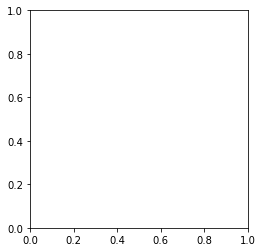

In [35]:
plt.imshow(detectKeypoints(image))

In [39]:
sift = SIFT_create()

NameError: name 'SIFT_create' is not defined

In [29]:
cv2.imshow('Image',)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

TypeError: imshow() missing required argument 'mat' (pos 2)

In [32]:
cv2.imshow('Image',orient)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()